In [76]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

In [59]:

def histogram_equalization(image):
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    # Normalize the CDF to the range [0, 255]
    cdf_normalized = (cdf * 255 / cdf[-1]).astype(np.uint8)
    equalized_image = cdf_normalized[image]

    return equalized_image

In [60]:
# Translation function
def translate_image(image, dx, dy):
    rows, cols = image.shape
    M = np.float32([[1, 0, dx], [0, 1, dy]])
    translated_image = np.zeros_like(image)
    for i in range(rows):
        for j in range(cols):
            new_i, new_j = i + dy, j + dx
            if 0 <= new_i < rows and 0 <= new_j < cols:
                translated_image[new_i, new_j] = image[i, j]
    return translated_image

In [73]:
def rotate_image(image, angle):
    # Rotate the image using scipy's rotate function
    rotated_image = rotate(image, angle, reshape=False, mode='nearest')

    return rotated_image

In [62]:
input_image=plt.imread("/content/input_image.png")
input_image=(input_image * 255).astype(np.uint8)

Text(0.5, 1.0, 'Original Image')

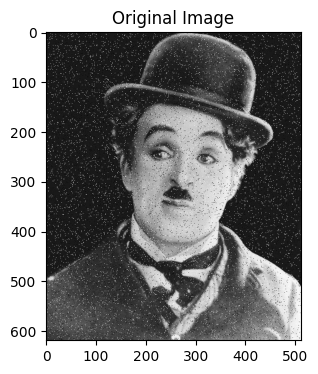

In [70]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Original Image')

In [63]:
equalized_image=histogram_equalization(input_image)

In [68]:
# Translation
translated_image = translate_image(equalized_image, 50, 30)

Text(0.5, 1.0, 'Translated Image')

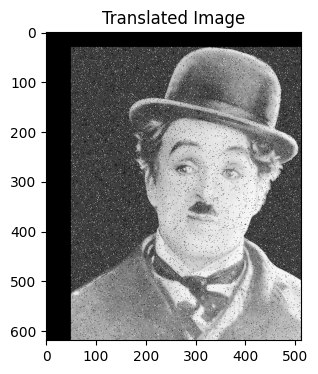

In [71]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 2)
plt.imshow(translated_image, cmap='gray')
plt.title('Translated Image')

In [77]:
# Rotation
rotated_image = rotate_image(input_image, 90)

Text(0.5, 1.0, 'Rotated Image')

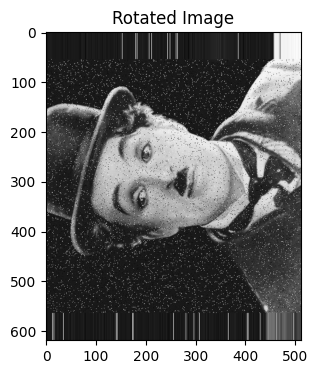

In [79]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.imshow(rotated_image, cmap='gray')
plt.title('Rotated Image')